## This section will be mainly composed by plots, not having so much complex data managment with pandas.

### To start, let's start analysing the relations of height x score, represetanting it in a matplotlib plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('players_stats_by_season_full_details.csv')
df = df[df['League'] == 'NBA']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 0 to 3791
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       3792 non-null   object 
 1   Season       3792 non-null   object 
 2   Stage        3792 non-null   object 
 3   Player       3792 non-null   object 
 4   Team         3792 non-null   object 
 5   GP           3792 non-null   int64  
 6   MIN          3792 non-null   float64
 7   FGM          3792 non-null   int64  
 8   FGA          3792 non-null   int64  
 9   3PM          3792 non-null   int64  
 10  3PA          3792 non-null   int64  
 11  FTM          3792 non-null   int64  
 12  FTA          3792 non-null   int64  
 13  TOV          3792 non-null   int64  
 14  PF           3792 non-null   int64  
 15  ORB          3792 non-null   int64  
 16  DRB          3792 non-null   int64  
 17  REB          3792 non-null   int64  
 18  AST          3792 non-null   int64  
 19  STL   

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,...,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,...,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,...,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,...,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,...,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


array([[<AxesSubplot:title={'center':'2009 - 2010 Season'}>,
        <AxesSubplot:title={'center':'2010 - 2011 Season'}>,
        <AxesSubplot:title={'center':'2011 - 2012 Season'}>,
        <AxesSubplot:title={'center':'2012 - 2013 Season'}>,
        <AxesSubplot:title={'center':'2013 - 2014 Season'}>],
       [<AxesSubplot:title={'center':'2014 - 2015 Season'}>,
        <AxesSubplot:title={'center':'2015 - 2016 Season'}>,
        <AxesSubplot:title={'center':'2016 - 2017 Season'}>,
        <AxesSubplot:title={'center':'2017 - 2018 Season'}>,
        <AxesSubplot:title={'center':'2018 - 2019 Season'}>]],
      dtype=object)

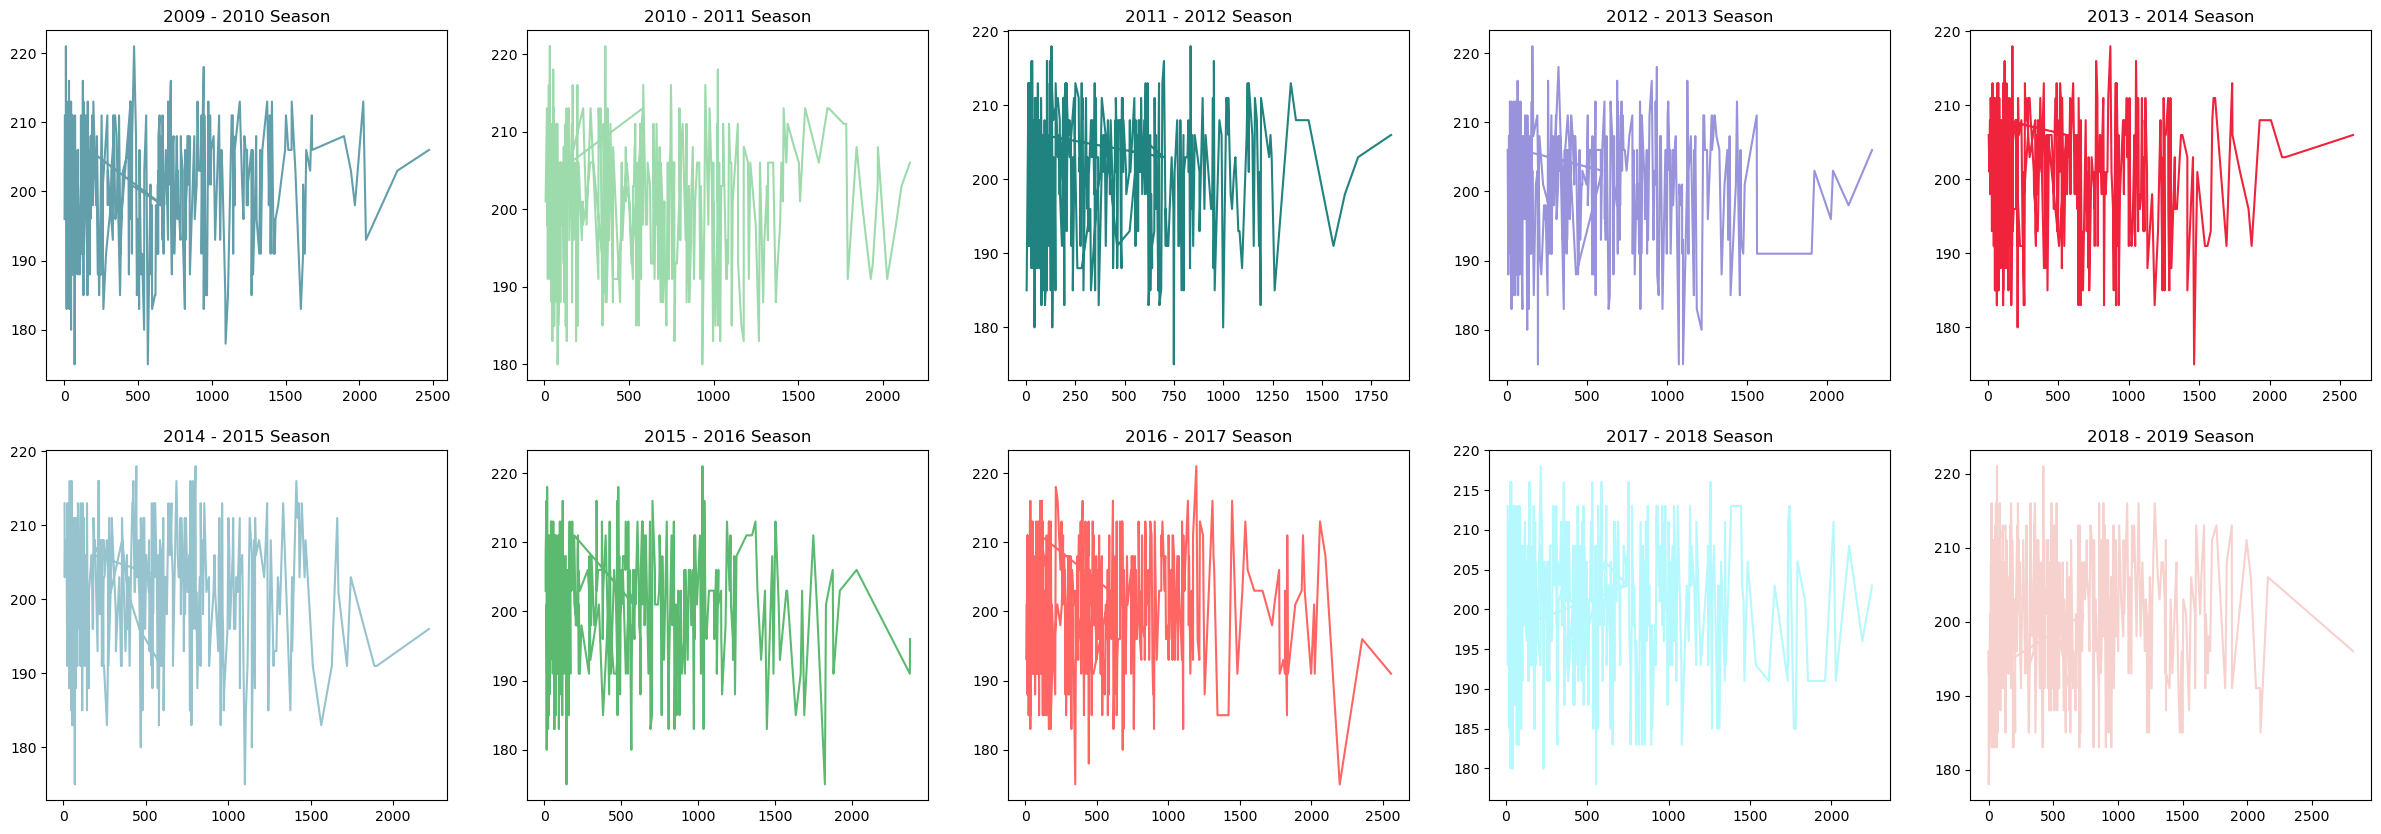

In [3]:
fig, ax = plt.subplots(2,5, figsize=(30,10))
arr = df['Season'].unique().reshape(2,5)
arr_color = [['#639FAB', '#9DDBAD', '#218380', '#9893DA','#EF233C'], ['#96C3CE', '#5BBA6F', '#FF6663','#B5F8FE', '#F7D1CD']]

for i  in range(2):
    for j in range(5):
        ax[i][j].plot(df[df['Season'] == arr[i][j]]['PTS'], df[df['Season'] == arr[i][j]]['height_cm'], color = arr_color[i][j])
        ax[i][j].title.set_text(arr[i][j] + '{}'.format(' Season'))
ax

#### Relation of the height between scoring. As you can see,  the top scorers of each season were between 200 cm to 210 cm (this standard tends to stay the same, but it doesn't necessarily happen, as seen on the 2016 - 2017 season, it has a top scorer below 180 cm, it was Isaiah Thomas on the time)

Allow us to analyze the relation of height and weight between blocking, stealing, offensive rebounds, defensive rebounds, turnovers and assists (we'll be taking the average of each stats and upper, as there's a lot of data to analyze)

In [4]:
df.keys()

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

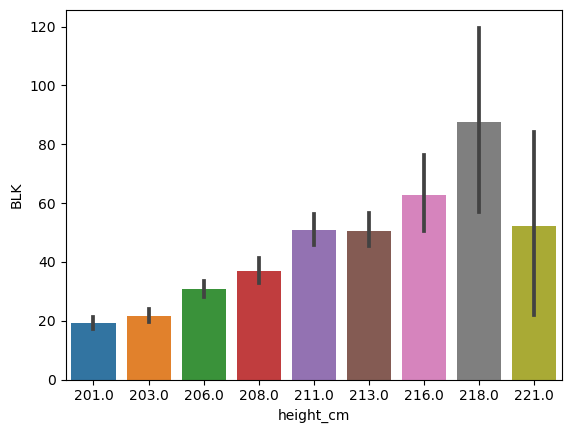

<Figure size 800x800 with 0 Axes>

In [19]:
sns.barplot(data = df[df['height_cm'] > 200], x = 'height_cm', y = 'BLK')
fig  = plt.figure(figsize=(8,8))

In [4]:
df['BLK'].corr(df['height_cm'])

0.43068105360254183

As we can see, the correlation between height and block isn't so high, however, the height is just a factor when considering the the quantity of blocks. It depends of the correlation of height, weight and wingspan. 

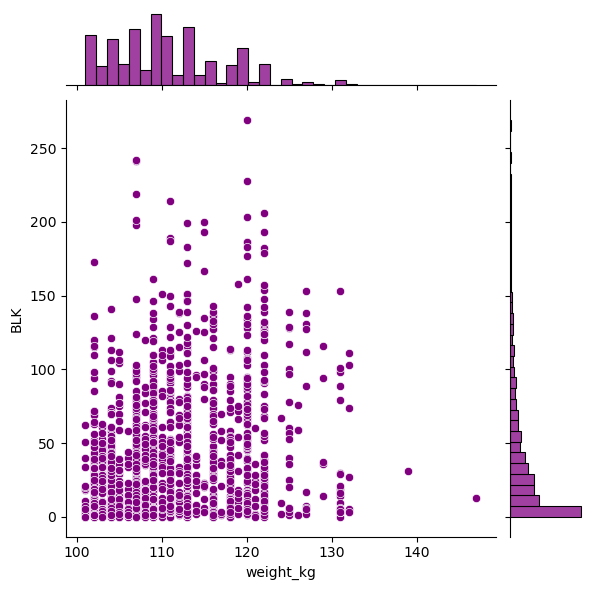

In [62]:
sns.jointplot(data = df[df['weight_kg'] > 100], x = 'weight_kg', y = 'BLK', color = 'purple')

Identifying the patterns, we can check that the points inside are mostly clustered into the 100-130 kg sample. We could check the correlation between somebody within this range, because when it starts going beyond that, the number of blocks also decrease.

In [29]:
df[df['weight_kg']<= 130]['BLK'].corr(df[df['weight_kg']<= 130]['weight_kg'])

0.40655410669176073

C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points ca

Text(0.5, 1.0, 'Beyond 2m')

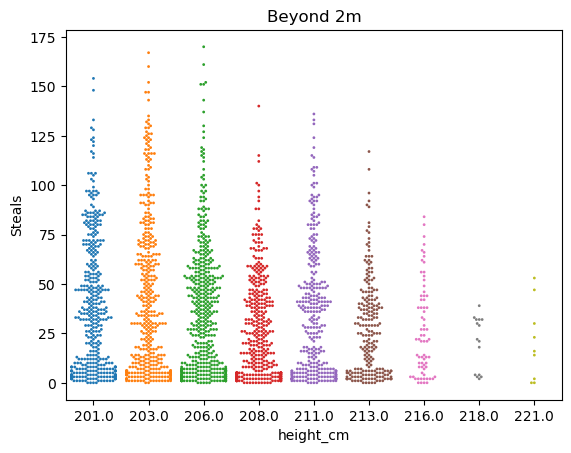

In [48]:
sns.swarmplot(data = df[df['height_cm'] >= 200], x = 'height_cm', y = 'STL',s = 2)
plt.ylabel('Steals')
plt.title('Beyond 2m')

Allow us to compare both the steal upper 200 cm and below 200 cm.

C:\Users\villa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Below 2m')

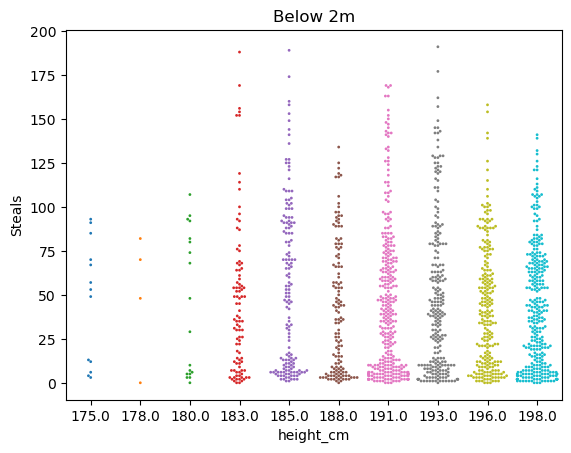

In [47]:
sns.swarmplot(data = df[df['height_cm'] <= 200], x = 'height_cm', y = 'STL',s = 2)
plt.ylabel('Steals')
plt.title('Below 2m')

Comparing both of them, we can check that the maximum values are stricly found on the 193 cm range, which means that they need to have a similar wingspan of somebody of 203 cm, however, they cannot be so tall, as it would change their speed and accuracy. 

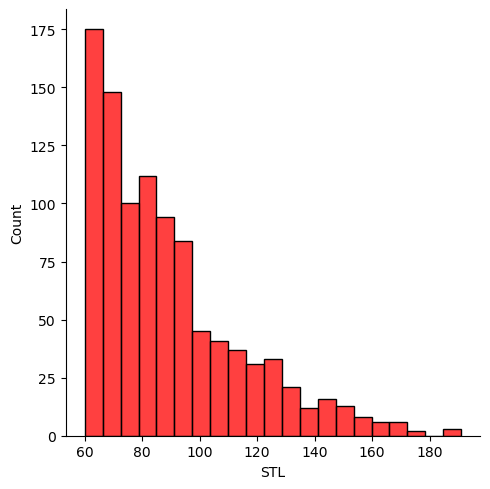

In [79]:
sns.displot(df[df['STL'] >= 60]['STL'], color = 'red')

Let's analyze offensive and defensive rebounds as an unit, because if we understand the numbers of each one, and their relations with height and weight we'll be able to tell on what NBA style of playing is most focused on. For this, let's create a pairplot, with relations of offensenvity, scoring, height, weight and defensity.

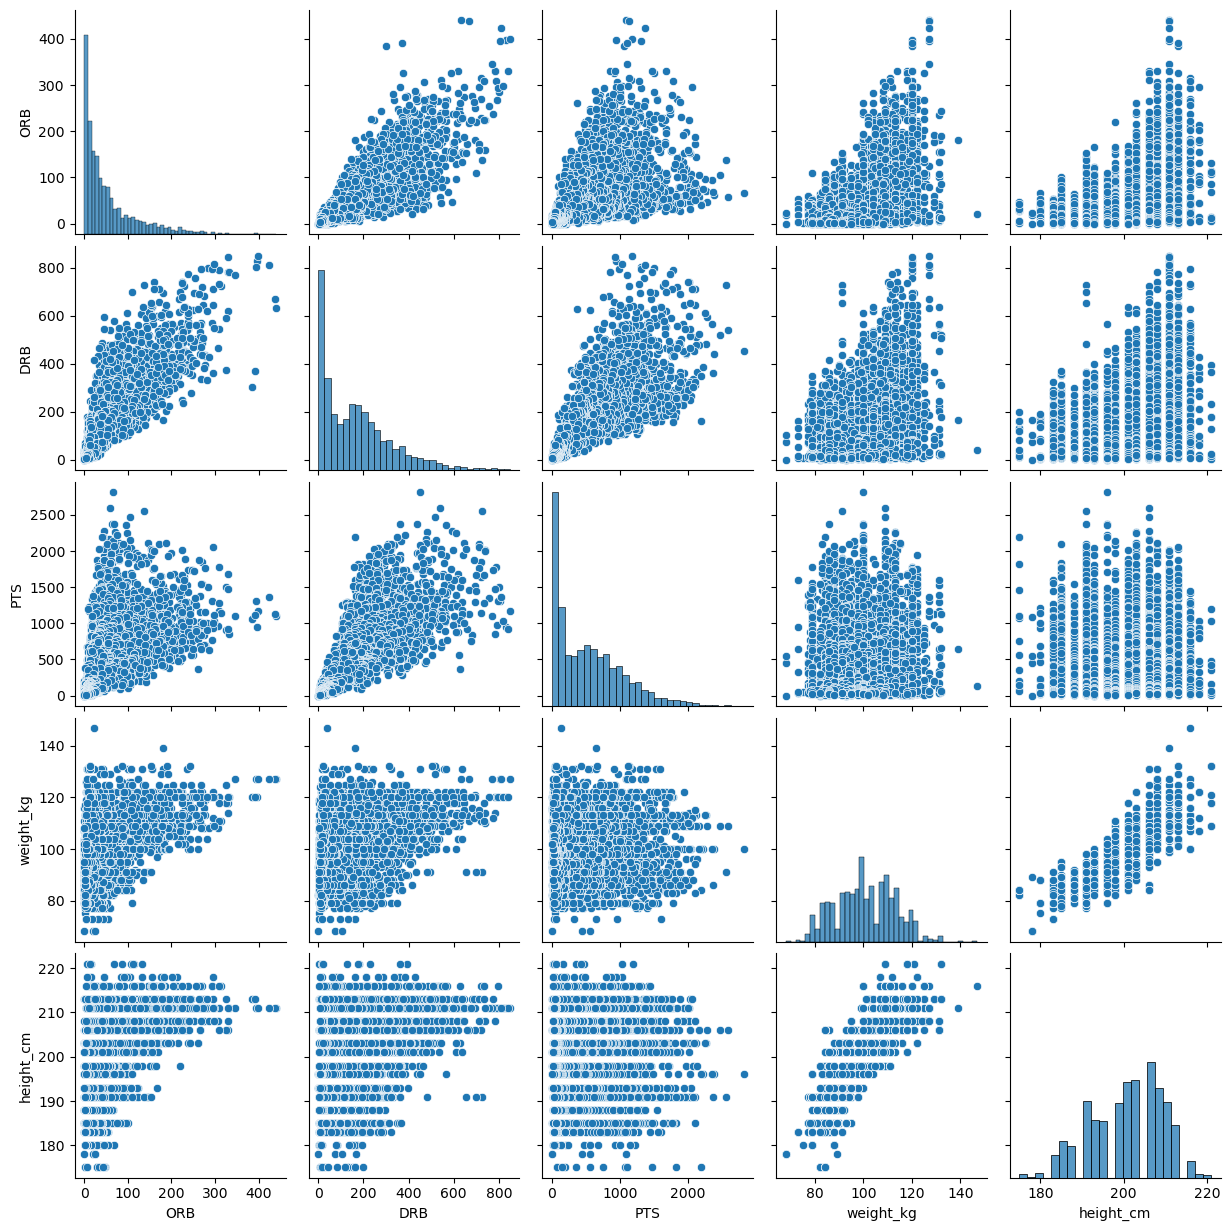

In [94]:
sns.pairplot(df[['ORB', 'DRB', 'PTS', 'weight_kg', 'height_cm']])

<AxesSubplot:>

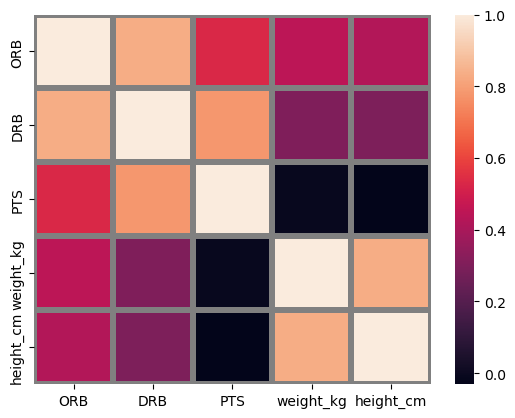

In [86]:
sns.heatmap(df[['ORB', 'DRB', 'PTS', 'weight_kg', 'height_cm']].corr(), linewidth = 4, linecolor = 'grey')

Analyzing the pairplot and the heatmap, we can see that the NBA style is much more balanced, tending to the combinations of both playstyles when needed. If you check the DRB and ORB relation, both have a positive relation between eachother, if one grows, the other also grows. Now, let's analyze the assists x turnovers, and which stats most make them happen, to conclude this project.

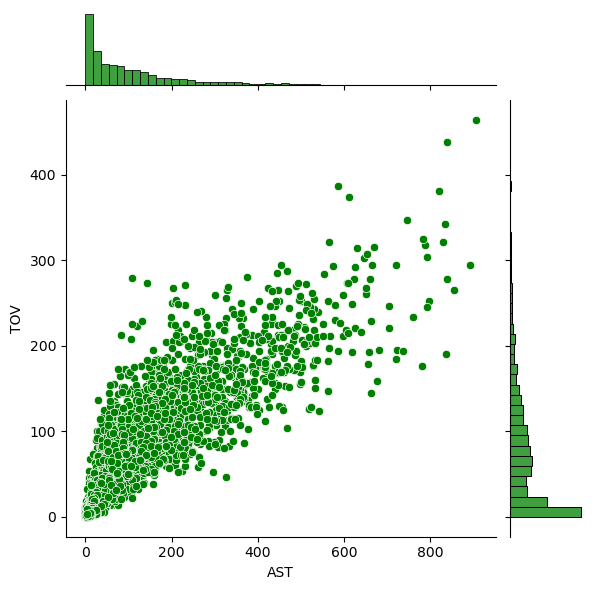

In [88]:
sns.jointplot(data = df, x = "AST", y = "TOV", color = 'green')

This is it, thanks for reading through my first project. It was a simple project, which only had the intention of learning and showing the libraries that I  learned: Matplotlib, Seaborn, Numpy and Pandas.